In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicides-risk-factors/death-rate-from-suicides-gho new.csv


# Preliminary Data Exploration
When we first load a dataset and begin to understand its structure, content, and the types of data it contains, this process is typically referred to as "Preliminary Data Exploration". This initial phase includes checking for missing values, understanding data types, and getting a sense of the distribution and scale of your data.

### Load the dataset

In [2]:
suicide_data = pd.read_csv('/kaggle/input/suicides-risk-factors/death-rate-from-suicides-gho new.csv',index_col=0)

In [3]:
suicide_data .head(20)

,Code,Year,Age-standardized suicide rate - Sex: both sexes
Entity,,,
Belize,BLZ,2000,10.0134
United States,USA,2000,10.0171
Uzbekistan,UZB,2000,12.0487
Ireland,IRL,2000,12.0547
Djibouti,DJI,2000,12.0624
Pakistan,PAK,2000,11.1006
Gambia,GMB,2000,11.1432
Germany,DEU,2000,11.1552
Sierra Leone,SLE,2000,10.133


The column **Age-standardized suicide rate - Sex** : both sexes represents the rate of suicides per 100,000 individuals in the population, with adjustments made to account for age differences. Age-standardization is a statistical process used to allow populations with different age structures to be compared. Here’s why it’s important:

Comparability: Different countries may have different age distributions. Without standardization, a country with an older population might naturally have a higher suicide rate because the risk of suicide tends to increase with age. Standardization removes this age distribution effect.

Sex: Both Sexes: This rate combines data for all genders, providing an overall picture of the suicide rate that is not specific to male or female populations.

In [4]:
suicide_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3876 entries, Belize to Norway
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Code                                             3876 non-null   object
 1   Year                                             3876 non-null   int64 
 2   Age-standardized suicide rate - Sex: both sexes  3876 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.1+ KB


**Index**: The DataFrame has 3876 entries. This means there are 3876 rows of data. The index range starts from 'Belize' and ends at 'Norway', which suggests that the data might be sorted or indexed by country name.

**Columns**: There are three columns in the DataFrame.

**Code**: This column contains non-null object-type data, meaning all 3876 rows have a country code, and it’s formatted as text (string).

**Year**: This column is completely populated with 3876 non-null integer values, denoting the year associated with each entry.

**Age-standardized suicide rate - Sex**: both sexes: This column also has 3876 non-null entries but is of the object type, which could indicate the presence of non-numeric characters, or it's simply read as a string

In [5]:
suicide_data.describe()

,Year
count,3876.000000
mean,2009.490196
std,5.761913
min,2000.000000
25%,2004.000000
50%,2009.000000
75%,2014.000000
max,2019.000000


Explanation of the output:
- **Count**: There are 3876 entries in the 'Year' column, which matches the total number of rows in the DataFrame, indicating there are no missing values in this column.

- **Mean**: The average year across all entries is approximately 2009.49. This suggests that the data is centered around the late-2000s to early-2010s.

- **Std (Standard Deviation)**: The standard deviation is about 5.76 years, which indicates how much the years vary from the average (mean) year.

- **Min (Minimum)**: The earliest year in the dataset is 2000.

- **25% (25th Percentile)**: At least 25% of the entries are from the year 2004 or earlier. This is the first quartile of the data.

- **50% (Median, 50th Percentile)**: The median year is 2009, meaning that half of the entries are from before 2009, and half are from after.

- **75% (75th Percentile)**: At least 75% of the entries are from the year 2014 or earlier. This is the third quartile.

- **Max (Maximum)**: The latest year in the dataset is 2019.


In [6]:
suicide_data.columns

Index(['Code', 'Year', 'Age-standardized suicide rate - Sex: both sexes'], dtype='object')

In [7]:
suicide_data.size

11628

In [8]:
suicide_data.shape

(3876, 3)

In [9]:
suicide_data.isna().sum()

Code                                               0
Year                                               0
Age-standardized suicide rate - Sex: both sexes    0
dtype: int64

In [10]:
suicide_data.duplicated().any()

False

# EDA

In [11]:
suicide_data['Age-standardized suicide rate - Sex: both sexes'] = (
    suicide_data['Age-standardized suicide rate - Sex: both sexes']
    .str.replace('.', '')  # Remove all periods
    .str.replace(',', '.')  # Replace commas with a period if necessary
    .astype(float)
)

In [12]:
suicide_data['Code'].value_counts()

Code
0      196
BLZ     20
COM     20
SVK     20
ISL     20
      ... 
MDA     20
SOM     20
BFA     20
TGO     20
SYC     20
Name: count, Length: 185, dtype: int64

 DataFrame are showing some country codes with a significantly higher count than others. Specifically, there is a code '0' with 196 occurrences, which is likely incorrect or represents missing or aggregated data

In [13]:
# Investigate rows where 'Code' is '0'
suspect_rows = suicide_data[suicide_data['Code'] == '0']
suspect_rows.head

<bound method NDFrame.head of                       Code  Year  \
Entity                             
Western Pacific          0  2000   
South-East Asia          0  2000   
Low-income               0  2000   
Upper-middle-income      0  2000   
Lower-middle-income      0  2000   
...                    ...   ...   
Eastern Mediterranean    0  2019   
South-East Asia          0  2019   
Africa                   0  2019   
Europe                   0  2019   
Upper-middle-income      0  2019   

                       Age-standardized suicide rate - Sex: both sexes  
Entity                                                                  
Western Pacific                                                14043.0  
South-East Asia                                                15108.0  
Low-income                                                    135735.0  
Upper-middle-income                                           144054.0  
Lower-middle-income                                           1

In [14]:
suicide_data['Code'].unique()

array(['BLZ', 'USA', 'UZB', 'IRL', 'DJI', 'PAK', 'GMB', 'DEU', 'SLE',
       'LUX', '0', 'CHN', 'POL', 'CHE', 'SLB', 'CMR', 'BDI', 'LKA', 'LSO',
       'ATG', 'SYR', 'HND', 'KWT', 'MYS', 'MLT', 'ARE', 'ARG', 'COL',
       'LBY', 'MDV', 'BHR', 'IRN', 'JAM', 'JOR', 'BRB', 'GEO', 'TJK',
       'LCA', 'TUN', 'DOM', 'PAN', 'NLD', 'GRD', 'SWE', 'NOR', 'CZE',
       'GTM', 'TKM', 'KOR', 'OWID_WRL', 'BGR', 'SEN', 'COD', 'URY', 'BEN',
       'TZA', 'CUB', 'TCD', 'KEN', 'FRA', 'AUT', 'TTO', 'WSM', 'HRV',
       'MDA', 'SOM', 'BFA', 'TGO', 'GNB', 'AGO', 'KGZ', 'JPN', 'CPV',
       'BEL', 'ETH', 'SRB', 'MNE', 'IND', 'MWI', 'GNQ', 'GAB', 'ZWE',
       'MOZ', 'UGA', 'FIN', 'VUT', 'ERI', 'MNG', 'CIV', 'ZMB', 'COG',
       'SUR', 'EST', 'RWA', 'SVN', 'ZAF', 'HUN', 'NAM', 'FSM', 'LVA',
       'CAF', 'UKR', 'PRK', 'KIR', 'GUY', 'BLR', 'KAZ', 'SWZ', 'LTU',
       'BWA', 'RUS', 'ROU', 'NZL', 'SGP', 'MUS', 'DNK', 'CHL', 'THA',
       'SVK', 'ISL', 'FJI', 'CAN', 'HTI', 'MDG', 'MAR', 'AUS', 'NPL',
       'CO

In [15]:
suicide_data = suicide_data.reset_index()


In [16]:
suicide_data['Entity'].unique()

array(['Belize', 'United States', 'Uzbekistan', 'Ireland', 'Djibouti',
       'Pakistan', 'Gambia', 'Germany', 'Sierra Leone', 'Luxembourg',
       'Western Pacific', 'China', 'South-East Asia', 'Poland',
       'Switzerland', 'Solomon Islands', 'Cameroon', 'Burundi',
       'Sri Lanka', 'Lesotho', 'Antigua and Barbuda', 'Syria', 'Honduras',
       'Kuwait', 'Malaysia', 'Malta', 'United Arab Emirates', 'Argentina',
       'Colombia', 'Libya', 'Maldives', 'Bahrain', 'Iran', 'Jamaica',
       'Jordan', 'Barbados', 'Georgia', 'Tajikistan', 'Saint Lucia',
       'Tunisia', 'Dominican Republic', 'Panama', 'Netherlands',
       'Grenada', 'Sweden', 'Norway', 'Czechia', 'Guatemala',
       'Low-income', 'Turkmenistan', 'South Korea', 'World', 'Bulgaria',
       'Upper-middle-income', 'Senegal', 'Democratic Republic of Congo',
       'Uruguay', 'Benin', 'Lower-middle-income', 'Tanzania', 'Africa',
       'Cuba', 'Chad', 'Kenya', 'France', 'Austria',
       'Trinidad and Tobago', 'Samoa', 'Croa

In [17]:
pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pycountry
import pandas as pd

# Function to retrieve the ISO Alpha-3 country code
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        # Country not found in the pycountry database
        return None

# Reset index if 'Entity' is an index
suicide_data.reset_index(inplace=True)

# Apply the function to the 'Entity' column in the suicide_data DataFrame
suicide_data['Code'] = suicide_data['Entity'].apply(get_country_code)

# Check the resulting DataFrame
print(suicide_data[['Entity', 'Code']].head(20))


             Entity  Code
0            Belize   BLZ
1     United States   USA
2        Uzbekistan   UZB
3           Ireland   IRL
4          Djibouti   DJI
5          Pakistan   PAK
6            Gambia   GMB
7           Germany   DEU
8      Sierra Leone   SLE
9        Luxembourg   LUX
10  Western Pacific  None
11            China   CHN
12  South-East Asia  None
13           Poland   POL
14      Switzerland   CHE
15  Solomon Islands   SLB
16         Cameroon   CMR
17          Burundi   BDI
18        Sri Lanka   LKA
19          Lesotho   LSO


In [19]:
suicide_data['Code'].value_counts()

Code
BLZ    20
COM    20
ISL    20
FJI    20
CAN    20
       ..
HRV    20
MDA    20
SOM    20
BFA    20
SYC    20
Name: count, Length: 175, dtype: int64

In [20]:
suicide_data['Code'].isnull().sum()

376

In [21]:
# To get a list of codes that have '0' or appear as `None` after the mapping
missing_codes = suicide_data[suicide_data['Code'].isnull()]['Entity'].unique()
print("Entities with no corresponding ISO code:", missing_codes)


Entities with no corresponding ISO code: ['Western Pacific' 'South-East Asia' 'Low-income' 'World'
 'Upper-middle-income' 'Democratic Republic of Congo'
 'Lower-middle-income' 'Africa' 'Cape Verde' 'Europe' "Cote d'Ivoire"
 'Micronesia (country)' 'Russia' 'High-income' 'Brunei' 'Turkey'
 'East Timor' 'Eastern Mediterranean' 'Americas']


In [22]:
zero_codes = suicide_data[suicide_data['Code'] == '0']['Entity'].unique()
print("Entities with '0' as code:", zero_codes)


Entities with '0' as code: []


In [23]:
suicide_data['Year'].value_counts()

Year
2000    194
2001    194
2018    194
2017    194
2016    194
2015    194
2014    194
2013    194
2012    194
2011    194
2010    194
2009    194
2008    194
2007    194
2006    194
2005    194
2004    194
2003    194
2002    194
2019    190
Name: count, dtype: int64

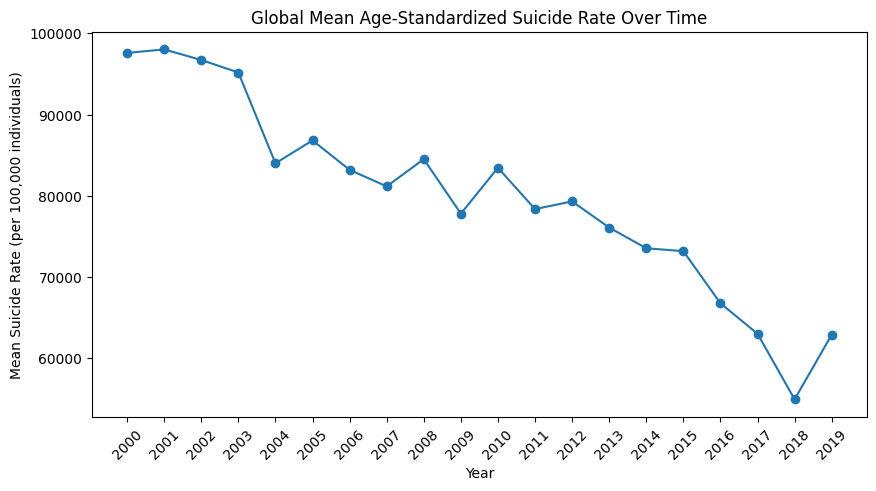

In [24]:
import matplotlib.pyplot as plt

# Convert 'Year' to integer if it's not already
suicide_data['Year'] = suicide_data['Year'].astype(int)

# Calculate mean suicide rates by year, assuming you've filtered out the non-country data already
mean_rates_by_year = suicide_data.groupby('Year')['Age-standardized suicide rate - Sex: both sexes'].mean()

# Generate the plot with the 'Year' as integer values
plt.figure(figsize=(10, 5))
plt.plot(mean_rates_by_year.index.astype(str), mean_rates_by_year.values, marker='o')

plt.title('Global Mean Age-Standardized Suicide Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Suicide Rate (per 100,000 individuals)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.show()


In [25]:
# Calculate mean suicide rates by country and sort
mean_rates_by_country = suicide_data.groupby('Entity')['Age-standardized suicide rate - Sex: both sexes'].mean().sort_values()

# Top 5 countries with the highest suicide rates
print("Highest suicide rates:")
print(mean_rates_by_country.tail(5))

# Top 5 countries with the lowest suicide rates
print("\nLowest suicide rates:")
print(mean_rates_by_country.head(5))


Highest suicide rates:
Entity
Belarus     286142.30
Russia      319670.75
Guyana      324817.15
Eswatini    453500.20
Lesotho     717783.10
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64

Lowest suicide rates:
Entity
Syria                  147.00
Brunei                 181.45
Jamaica                197.40
Kuwait                 199.00
Antigua and Barbuda    199.65
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64


In [26]:
# This assumes that non-country entities like regions have been assigned unique identifiers in the 'Code' column
regional_rates = suicide_data[suicide_data['Code'].str.len() == 3].groupby('Entity')['Age-standardized suicide rate - Sex: both sexes'].mean()
print("Regional suicide rates:")
print(regional_rates.sort_values())


Regional suicide rates:
Entity
Syria                       147.00
Jamaica                     197.40
Kuwait                      199.00
Antigua and Barbuda         199.65
Sao Tome and Principe       201.35
                           ...    
Kazakhstan               278490.55
Belarus                  286142.30
Guyana                   324817.15
Eswatini                 453500.20
Lesotho                  717783.10
Name: Age-standardized suicide rate - Sex: both sexes, Length: 175, dtype: float64


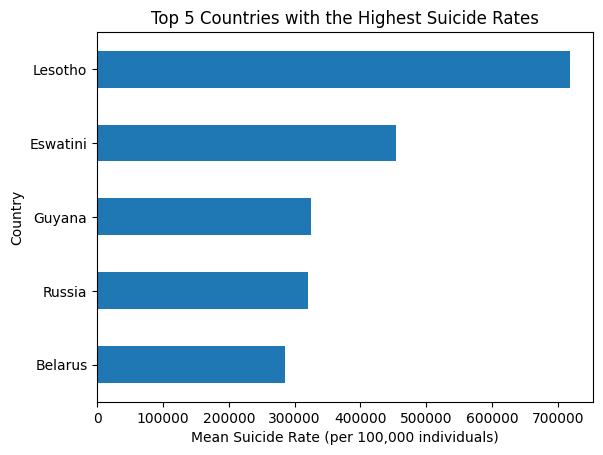

In [27]:
import matplotlib.pyplot as plt

# Calculate mean suicide rates by country and sort
mean_rates_by_country = suicide_data.groupby('Entity')['Age-standardized suicide rate - Sex: both sexes'].mean().sort_values()

# Get the top 5 countries with the highest suicide rates
top5_highest = mean_rates_by_country.tail(5)

# Plotting the highest suicide rates
top5_highest.plot(kind='barh')
plt.title('Top 5 Countries with the Highest Suicide Rates')
plt.xlabel('Mean Suicide Rate (per 100,000 individuals)')
plt.ylabel('Country')
plt.show()



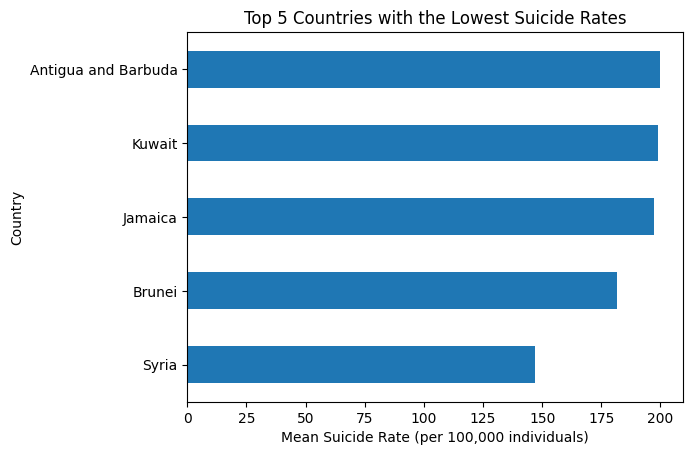

In [28]:
top5_lowest = mean_rates_by_country.head(5)
# Plotting the lowest suicide rates
top5_lowest.plot(kind='barh')
plt.title('Top 5 Countries with the Lowest Suicide Rates')
plt.xlabel('Mean Suicide Rate (per 100,000 individuals)')
plt.ylabel('Country')
plt.show()
